In [2]:
import numpy as np
import load_stats as stat_reader
import importlib
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
sns.distplot(par_stats.x_proj_diff, kde=False)
plt.xlabel(r'$x_4^{parabolic\, projection} - x_4^{linear\, projection}$', fontsize=14)
plt.ylabel('Counts')
plt.annotate(f"$\mu$ = {np.mean(par_stats.x_proj_diff):.3f},\n$\sigma$ = {np.std(par_stats.x_proj_diff):.3f}",\
             (0.7,0.8),xycoords='figure fraction', fontsize=12)
# plt.savefig('figures/x_proj_diff.pdf', bbox_inches='tight')
plt.show()

In [75]:
# plt.hist(par_stats.tx_diff, bins=150)
sns.distplot(par_stats.tx_diff, kde=False)
plt.xlabel(r'$tx^{parabolic} - tx^{linear}$', fontsize=14)
plt.ylabel('Counts')
plt.annotate(f"$\mu$ = {np.mean(par_stats.tx_diff):.3f},\n$\sigma$ = {np.std(par_stats.tx_diff):.3f}",\
             (0.7, 0.8), xycoords='figure fraction', fontsize=12)
# plt.savefig('figures/tx_diff.pdf', bbox_inches='tight')
plt.show()

In [108]:
importlib.reload(stat_reader)
# fnames_non_par = glob.glob('stats_non_parallel/*.json')
# non_par_stats = stat_reader.load_stats(fnames_non_par) 
fnames_par = glob.glob('../omega_corr/stats/*.json')
par_stats = stat_reader.load_stats(fnames_par) 

In [109]:
flat_true_par = np.concatenate(par_stats.true_x_proj_diff_parabolic).ravel()
flat_true_linear = np.concatenate(par_stats.true_x_proj_diff_linear).ravel()
flat_charges = np.concatenate(par_stats.true_charges).ravel()

minus_par = []
plus_par = []
for charge, true_x_diff_parabolic in zip(flat_charges,flat_true_par):
    if charge > 0:
        plus_par.append(true_x_diff_parabolic)
    else:
        minus_par.append(true_x_diff_parabolic)

In [110]:
plt.hist(plus_par, bins=100, alpha=0.5, label=f'Pos, $\mu$={np.mean(plus_par):.3f}')
plt.hist(minus_par, bins=100, alpha=0.5, label=f'Neg, $\mu$={np.mean(minus_par):.3f}')
plt.xlabel('$x_4^{true} - x_4^{parabolic\, projection}$, mm', fontsize=14)
plt.ylabel('Counts', fontsize=16)
plt.xlim([-8,8])
plt.ylim([0,1600])
plt.legend(fontsize=13)
plt.savefig('figures/charge_sep_parabolic_corr.pdf', bbox_inches='tight')
plt.show()

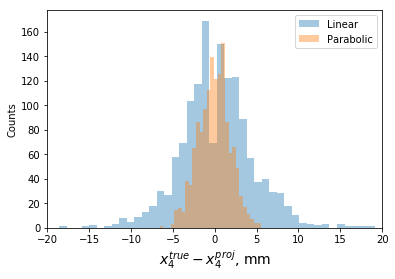

In [83]:
sns.distplot(flat_true_linear,kde=False, label='Linear')
sns.distplot(flat_true_par,kde=False, label='Parabolic')
plt.legend()
plt.xlim([-20,20])
plt.xlabel(r'$x_4^{true} - x_4^{proj}$, mm', fontsize=14)
plt.ylabel('Counts')
# plt.savefig('figures/par_vs_lin_proj.pdf', bbox_inches='tight')
plt.show()

In [178]:
minus_lin = []
plus_lin = []
for charge, true_x_diff_linear in zip(flat_charges,flat_true_linear):
    if charge > 0:
        plus_lin.append(true_x_diff_linear)
    else:
        minus_lin.append(true_x_diff_linear)

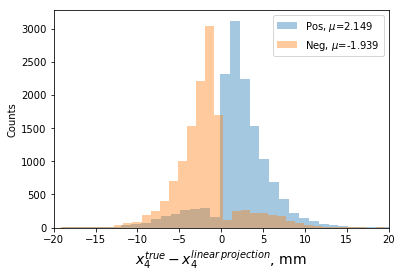

In [199]:
sns.distplot(plus_lin, kde=False, label=f'Pos, $\mu$={np.mean(plus_lin):.3f}')
sns.distplot(minus_lin, kde=False, label=f'Neg, $\mu$={np.mean(minus_lin):.3f}')
plt.xlabel('$x_4^{true} - x_4^{linear\, projection}$, mm', fontsize=14)
plt.ylabel('Counts')
plt.xlim([-20,20])
plt.legend()
plt.savefig('figures/charge_sep_linear.pdf', bbox_inches='tight')
plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.600e+01,
        6.631e+03, 2.000e+00, 2.000e+00, 4.000e+00]),
 array([-33.415234 , -28.0251176, -22.6350012, -17.2448848, -11.8547684,
         -6.464652 ,  -1.0745356,   4.3155808,   9.7056972,  15.0958136,
         20.48593  ]),
 <a list of 10 Patch objects>)

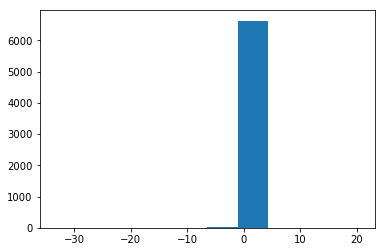

In [111]:
plt.hist(par_stats.tx_diff_rel, bins=10)

In [136]:
fnames_f64 = glob.glob('../test_dir_f64/stats/*.json')
f64 = stat_reader.load_stats(fnames_f64) 
fnames_f32 = glob.glob('../test_dir_f32/stats/*.json')
f32 = stat_reader.load_stats(fnames_f32) 

In [142]:
plt.scatter(f64.ft_size,f64.time)
plt.scatter(f32.ft_size,f32.time)
plt.yscale('log')
plt.ylim([1e-3, 10])

(0.001, 10)